In [38]:
#-------------------------- Working from here --------------------------

In [1]:
import numpy as np
import os
import scipy.io as sio
import cv2
import math
from math import cos, sin
import dlib
import glob
from pathlib import Path
import pandas as pd
from PIL import Image, ImageFilter
from imutils import face_utils
import matplotlib.pyplot as plt

In [2]:
mylist2 = [Path(f).stem for f in glob.glob("C:/Users/Abdellrahman Amgad/Desktop/AFLW2000/AFLW2000/*.mat")]
points_x_y=[]
features_2=[]
labesl_2=[]
imagename=[]
for i in range(len(mylist2)):
    mm = sio.loadmat(mylist2[i])
    pos = mm['Pose_Para'][0][:3]*180/np.pi #Yaw pitch roll
    points = mm['pt3d_68']
    bins = np.array(range(-99, 102, 3))
    labels =np.digitize(pos, bins) - 1 
    points_x_y.append(np.concatenate((points[0],points[1])))
    features_2.append(pos)
    labesl_2.append(labels)
    imagename.append(mylist2[i][:-4])

In [3]:
labesl_2[0]

array([25, 33, 34], dtype=int64)

In [4]:
def read_mat(path):
    # remove the .jpg extension
    path = path.split('.jpg')[0]
    # add the .mat extension
    path = path + '.mat'
    data = sio.loadmat(path)
    landmarks = data['pt3d_68']
    labels = data['Pose_Para'][0][:3]
    pitch, yaw, roll = labels
    return landmarks, pitch, yaw, roll

In [5]:
points_x_y_2=[]
features_2_2=[]
labesl_2_2=[]
imagename=[]
def get_points(path):
    mm = sio.loadmat(path)
    pos = mm['Pose_Para'][0][:3]*180/np.pi #Yaw pitch roll
    points = mm['pt3d_68']
    bins = np.array(range(-99, 102, 3))
    labels =np.digitize(pos, bins) - 1 
    points_x_y_2.append(np.concatenate((points[0],points[1])))
    features_2_2.append(pos)
    labesl_2_2.append(labels)

In [6]:
path = 'C:/Users/Abdellrahman Amgad/Desktop/AFLW2000/AFLW2000/image04356.mat'
get_points(path)
print(points_x_y_2)

[array([196.66695, 198.98953, 203.95448, 206.42635, 205.30664, 205.14204,
       203.39407, 209.77708, 232.91518, 262.3002 , 285.8422 , 307.7374 ,
       328.03278, 336.17017, 342.9721 , 347.01236, 348.4016 , 165.32835,
       163.6057 , 167.94308, 175.0811 , 183.57916, 226.06142, 237.91957,
       253.57544, 271.50677, 288.00677, 205.01901, 201.16763, 196.98984,
       196.9718 , 201.35847, 203.44275, 209.58368, 218.8117 , 227.5376 ,
       177.64983, 176.86008, 186.33862, 198.64209, 188.97087, 180.88742,
       239.97523, 246.44266, 256.91635, 270.4153 , 258.98422, 247.19109,
       193.33829, 198.29053, 206.90697, 212.67783, 218.6966 , 233.98894,
       257.06436, 242.38275, 231.92438, 222.04007, 213.2962 , 204.82114,
       196.12024, 208.62714, 215.87724, 224.65387, 255.30893, 232.66238,
       224.39986, 216.31512, 224.57094, 249.54057, 272.62775, 294.61945,
       321.8786 , 343.21893, 359.30008, 372.3955 , 377.91202, 368.23734,
       354.33234, 338.68292, 317.34216, 290.23758,

In [7]:
df =pd.DataFrame(points_x_y)
df2 = pd.DataFrame(features_2,columns=["pitch","yaw","roll"])
df3 = pd.DataFrame(labesl_2,columns=["y","x","z"])
df3 = pd.DataFrame(imagename,columns=["image"])
df4 = pd.concat([df,df2,df3],axis=1)

In [8]:
df4.to_csv("Angels",index=False)
df=pd.read_csv("Angels")
df

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,pitch,yaw,roll,image
0,121.868034,122.367607,126.819237,130.831787,137.523132,148.521729,161.528015,182.876678,213.940063,248.005371,...,313.233856,315.107117,322.384613,330.965576,330.701965,324.903870,-22.874239,1.044306,4.908885,NaN
1,281.238159,277.339417,274.876953,269.523773,257.788269,240.968155,221.801483,205.846298,207.085449,226.185638,...,300.724457,300.060974,303.260895,299.485168,300.598602,302.286499,26.932741,68.155235,17.243670,NaN
2,236.385101,239.198257,242.566376,243.971375,242.828186,238.567902,232.561859,229.155289,238.303162,259.122467,...,302.877289,302.146454,300.489380,303.481873,304.681732,304.631042,-10.579652,50.485409,-13.570644,NaN
3,168.029221,177.697510,190.641602,201.395294,211.957214,222.723099,231.350220,244.332855,268.327637,291.832214,...,312.701294,310.133301,300.041290,315.544800,319.498596,320.843994,-10.048455,17.143373,-21.392780,NaN
4,280.462250,287.249817,293.892456,297.539368,295.677002,287.270355,271.661591,254.701157,250.219299,261.212463,...,307.014893,305.351318,309.934814,311.558899,312.920746,312.058350,-50.544579,68.640549,-59.207973,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,112.578934,113.787857,119.259262,125.335999,133.637939,146.153839,162.205170,183.907257,213.987427,243.809875,...,317.718140,319.277924,321.063141,324.635498,324.518494,322.085815,-11.293093,-4.035367,6.022806,NaN
1996,111.117966,113.647079,115.328712,120.565918,134.109467,158.448425,187.568314,212.202332,223.977646,218.683380,...,316.013428,315.392395,316.949585,316.981415,317.922302,318.168457,-13.327947,-81.288437,10.081746,NaN
1997,308.227417,309.905334,311.432251,310.488586,303.662415,288.275238,268.575409,248.855255,239.939240,248.186981,...,311.580597,311.960449,316.873444,314.677002,315.051239,313.333374,-82.961678,82.005554,-86.483292,NaN
1998,106.611572,106.089981,107.328842,109.023941,116.216049,136.338547,162.523712,190.193268,208.983047,210.192596,...,310.208862,310.287506,312.933044,313.265747,313.581848,312.269653,-24.090855,-68.249329,25.869925,NaN


In [9]:
#checking for null values
df.isnull().sum().sum()

2000

Importing model and preparation

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.preprocessing import RobustScaler,StandardScaler,Normalizer
from sklearn.pipeline import make_pipeline


In [11]:
X = df.drop(['yaw', 'pitch', 'roll','image'], axis=1)
yaw = df['yaw']
pitch = df['pitch']
roll = df['roll']

X_train_yaw, X_test_yaw, y_train_yaw, y_test_yaw = train_test_split(X,yaw,test_size=0.2,random_state=0,shuffle=True)

X_train_pitch, X_test_pitch, y_train_pitch, y_test_pitch = train_test_split(X,pitch,test_size=0.1,random_state=0,shuffle=True)

X_train_roll, X_test_roll, y_train_roll, y_test_roll = train_test_split(X,roll,test_size=0.09,random_state=0,shuffle=True)

In [12]:
print(type(X_train_yaw))
print(X_train_yaw.head())

<class 'pandas.core.frame.DataFrame'>
               0           1           2           3           4           5  \
582   133.024902  123.157028  115.973061  112.010468  113.877136  125.690033   
159    96.833405  100.920624  105.222237  111.198906  123.807724  147.729721   
1827  119.359512  124.309914  133.751526  142.119263  152.626694  166.901245   
318   189.087830  193.407272  199.935852  206.531433  213.741608  220.234802   
708   134.539413  139.146118  145.998230  152.679398  162.019592  174.511475   

               6           7           8           9  ...         126  \
582   146.163727  165.842743  184.988831  197.245483  ...  307.401245   
159   174.976273  202.484344  222.453430  223.352463  ...  325.283997   
1827  181.692688  202.235672  233.249741  263.302277  ...  337.052368   
318   223.874634  229.046844  247.165695  272.660645  ...  327.271240   
708   188.230988  205.159424  234.649948  265.020355  ...  322.754181   

             127         128         129  

In [13]:
#good full code  edit here zabt dah

model_yaw = svm.SVR(C=15,epsilon=0.5).fit(X_train_yaw, y_train_yaw) #edit parameters here 

model_pitch =xgb.XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=11, min_child_weight=110, gamma=0, subsample=1, colsample_bytree=1, nthread=4).fit(X_train_pitch, y_train_pitch)

model_roll = xgb.XGBRegressor(n_estimators=1000, max_depth=6, eta=0.1,subsample=1, colsample_bytree=1).fit(X_train_roll, y_train_roll)

y_pred_yaw = model_yaw.predict(X_test_yaw)
y_pred_pitch = model_pitch.predict(X_test_pitch)
y_pred_roll = model_roll.predict(X_test_roll)
print("yaw = ",r2_score(y_test_yaw, y_pred_yaw)*100,"%")
print("pitch = ",r2_score(y_test_pitch, y_pred_pitch)*100,"%")
print("roll = ",r2_score(y_test_roll, y_pred_roll)*100,"%")

yaw =  99.68945333846027 %
pitch =  91.95447968301261 %
roll =  98.41174500939276 %


In [14]:
X_test_yaw

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
405,161.606003,159.527069,161.176483,163.134888,165.226440,168.872070,174.185760,185.662567,210.651428,241.704681,...,312.282837,308.984406,301.092224,291.798706,291.350983,293.110138,306.235992,304.023926,303.721008,302.653931
1190,197.797882,197.918015,199.806305,202.150177,203.389236,204.427551,204.526138,207.812622,224.312225,251.208740,...,303.631409,300.396790,296.130249,294.317444,295.595215,295.501648,299.070587,295.780701,295.785156,295.032928
1132,122.763931,131.402985,142.432953,151.539551,163.886169,179.781982,194.818832,217.074371,252.084427,285.106689,...,348.103058,338.081116,307.939636,305.441101,303.126404,299.801636,292.100647,329.194366,334.473145,334.691162
731,106.762611,112.917206,122.394989,131.783936,145.178680,163.205399,182.563889,207.433548,241.845123,271.430908,...,330.902130,325.048279,309.521454,303.202911,301.524200,299.289429,299.796509,318.010895,321.311615,321.015381
1754,190.140488,195.147491,202.142624,208.155655,212.655548,216.076752,218.259644,226.400528,244.243530,267.954987,...,319.742035,315.308136,307.323700,302.909790,301.585358,300.927368,302.246765,309.216980,310.736938,310.712585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,111.937553,117.318924,125.593643,132.914352,142.817505,157.604767,175.209641,198.552948,233.005829,265.517609,...,331.962219,324.326111,304.251984,302.785583,301.678131,300.969727,298.032684,319.375732,321.840942,320.779907
360,88.048706,90.748329,96.079468,102.459328,114.377937,136.105408,162.738739,193.583786,228.844360,254.684479,...,330.324463,324.533936,314.167938,314.376923,315.150696,314.607849,313.629730,319.191193,319.966125,318.820892
1810,200.589050,208.803528,219.907806,228.203064,232.952316,234.407074,233.368622,235.810028,251.440475,274.075623,...,316.950287,316.428131,314.789429,305.299561,301.267883,298.139648,292.602966,297.826874,301.069092,304.595428
1743,132.279785,126.026215,123.569237,122.026672,124.843376,134.061539,148.188599,170.347870,202.351517,239.216370,...,318.997528,307.035522,288.552002,301.404663,305.875122,309.830780,317.833252,319.623688,317.032471,310.802429


In [26]:
def draw_axis_1(img, yaw, pitch, roll, tdx=None, tdy=None, size = 100):

    pitch = pitch * np.pi / 180
    yaw = -(yaw * np.pi / 180)
    roll = roll * np.pi / 180

    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

In [27]:
def draw_axis(img, yaw, pitch, roll, tdx=None, tdy=None, size = 60):
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

In [28]:
def show_image(path):
    capture = cv2.VideoCapture(path)
    ret, frame = capture.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # convert to RGB format for matplotlib
    landmarks, pitch, yaw, roll = read_mat(path)

    x,y = landmarks[0,32], landmarks[1,32]
    plt.imshow(draw_axis(frame, -yaw, pitch, roll, x, y))
    plt.show()

    capture.release()
    cv2.destroyAllWindows()

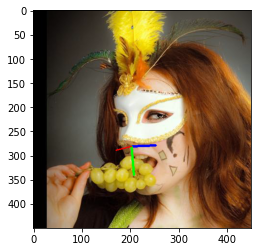

In [29]:
path = 'C:/Users/Abdellrahman Amgad/Desktop/AFLW2000/AFLW2000/image04356.jpg'
show_image(path)

In [32]:
def show_image_2(path,path2):
    capture = cv2.VideoCapture(path)
    ret, frame = capture.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # convert to RGB format for matplotlib
    landmarks= read_mat(path2)

    xxx = np.array(landmarks)
    x0 = xxx[0][0]
    y0 = xxx[0][1]
    
    test = []
    for i in range(len(x0)):
        test.append(x0[i])
        test.append(y0[i])

    test = np.array(test).reshape(1,-1)
    xx = np.array(points_x_y_2[-1]).reshape(1,-1)

    y_pred_yaw = model_yaw.predict(xx)
    y_pred_pitch = model_pitch.predict(xx)
    y_pred_roll = model_roll.predict(xx)

    x, y = x0[32], y0[32]
    plt.imshow(draw_axis_1(frame, y_pred_yaw, y_pred_pitch,y_pred_roll, x, y))
    plt.show()
    capture.release()
    cv2.destroyAllWindows()

C:\Users\ABDELL~1\AppData\Local\Temp/ipykernel_984/361204442.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xxx = np.array(landmarks)


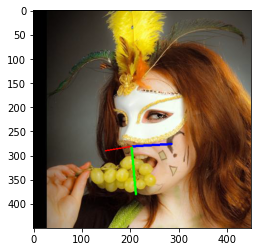

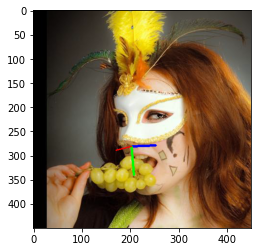

In [33]:
path = 'C:/Users/Abdellrahman Amgad/Desktop/AFLW2000/AFLW2000/image04356.jpg'
path2= 'C:/Users/Abdellrahman Amgad/Desktop/AFLW2000/AFLW2000/image04356'
show_image_2(path,path2)

path3 = 'C:/Users/Abdellrahman Amgad/Desktop/AFLW2000/AFLW2000/image04356.jpg'
show_image(path3)

In [34]:
predictor=dlib.shape_predictor('C:/Users/Abdellrahman Amgad/Desktop/AFLW2000/shape_predictor_68_face_landmarks.dat')
cnn_face_detector = dlib.get_frontal_face_detector()

In [45]:
for img in os.listdir("test") :
    frame = cv2.imread(os.path.join("test",img))
    cv2_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    cv2_frame = cv2.resize(cv2_frame,(450,400), interpolation = cv2.INTER_AREA)
    dets = cnn_face_detector(cv2_frame, 1)
    for (idx, det) in enumerate(dets):
                
        shape = predictor(cv2_frame, det)
        face = face_utils.shape_to_np(shape)
        face=np.concatenate((face[:,0],face[:,1])).reshape(1,-1)
        
        y_pred_yaw = model_yaw.predict(face)
        y_pred_pitch = model_pitch.predict(face)
        y_pred_roll = model_roll.predict(face)   
        
        shapeP = face_utils.shape_to_np(shape)
        cv2.putText(cv2_frame,'yaw : '+str(y_pred_yaw), (0, 20), cv2.FONT_HERSHEY_SIMPLEX,0.5, (246,255,12), 2)
        cv2.putText(cv2_frame,'pitch : ' + str(y_pred_pitch), (0, 50), cv2.FONT_HERSHEY_SIMPLEX,0.5, (246,255,12), 2)
        cv2.putText(cv2_frame,'roll : '+ str(y_pred_roll), (0, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (246,255,12),2)
        jj=0
        for (x, y) in shapeP:
            cv2.putText(cv2_frame,str(jj), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.1, (246,255,12), 3)
            jj +=1
        tdx,tdy=shape.part(30).x, shape.part(30).y                
    cv2.imwrite(os.path.join("result",img),draw_axis_1(cv2_frame, -y_pred_yaw, y_pred_pitch,y_pred_roll,tdx,tdy))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

C:\Users\ABDELL~1\AppData\Local\Temp/ipykernel_984/982022316.py:13: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(images) / columns + 1, columns, i + 1)


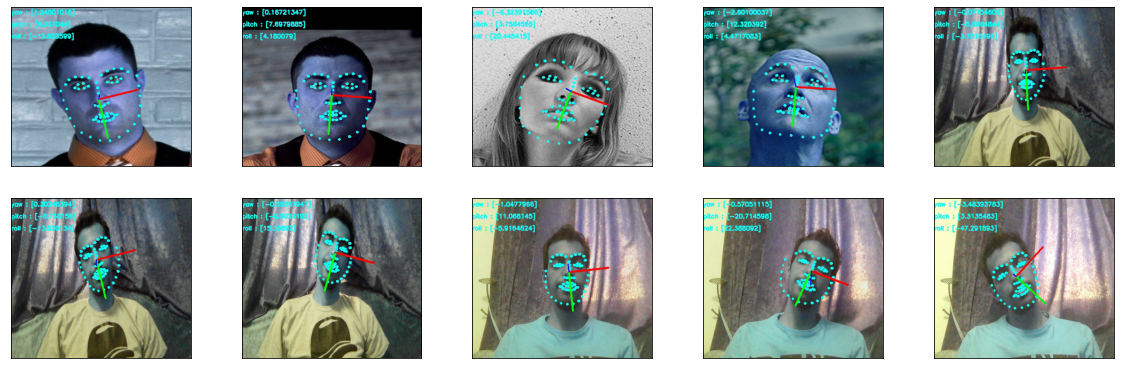

In [46]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob("C:/Users/Abdellrahman Amgad/Desktop/AFLW2000/AFLW2000/result/*.JPG"):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

In [30]:
#Video code  ::::: 
%pylab inline
from IPython.display import clear_output
from imutils import face_utils
import dlib
import cv2
# get landmarks from dlib
p = "shape_predictor_68_face_landmarks.dat"
predictor=dlib.shape_predictor('C:/Users/Abdellrahman Amgad/Desktop/AFLW2000/shape_predictor_68_face_landmarks.dat')
cnn_face_detector = dlib.get_frontal_face_detector()
frame_count = 0
path = 'resources/test6.jpg'
# path = 'resources/300W-3D/AFW/134212_1.jpg'
capture = cv2.VideoCapture(0)

while capture.isOpened():
    ret, frame = capture.read()
    frame_count += 1
    if frame_count % 4 == 0:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        gray = cv2.resize(gray,(450,450), interpolation = cv2.INTER_AREA)
        # print(gray.shape) #1
        rects = cnn_face_detector(gray, 1)
        # plt.imshow(gray)
        rbg = frame[:,:,::-1]
        # store the landmarks in a numpy array
        landmarks = np.zeros((2, 68), dtype=int)

        for (i, rect) in enumerate(rects):
            shape_ = predictor(gray, rect)
            shape_ = face_utils.shape_to_np(shape_)
            # print(shape.shape)
            # print(shape_)
            
            for (x,y) in shape_:
                        plt.plot(x,y,'bo', markersize=1)
            landmarks = shape_.T
            # print(landmarks)
        # print(landmarks.shape)
        
        # print(landmarks.shape) #1
        # print(landmarks) #1
        nose_x, nose_y = landmarks[0,33], landmarks[1,33]
        # print(nose_x, nose_y) #1
        landmarks_ = landmarks.reshape(1, -1)
        pitch_pred = model_yaw.predict(landmarks_)
        yaw_pred = model_pitch.predict(landmarks_)
        roll_pred = model_roll.predict(landmarks_)
        plt.imshow(draw_axis_1(gray, yaw_pred, pitch_pred, roll_pred, nose_x, nose_y))
        plt.show()
        clear_output(wait=True)

KeyboardInterrupt: 